# Response Time Statistics for the Police Districts

This notebook inspect statistics of:
1) Single police districts
2) Within-district - differences between the cars
3) Between districts


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import utilityModule # own custom functions

## Load data saved from the main analysis script

In [2]:
# Constants from analysis script - from step 5.1. in main analysis
car_capacity_dict = {
    "Oslo": 2143,
    "East": 1544,
    "SouthEast": 1298,
    "Agder": 521,
    "SouthWest": 1029,
    "West": 1080,
    "MoreRomsdal": 415,
    "Inland": 430,
    "Trondelag": 797,
    "Nordland": 393,
    "Troms": 248,
    "Finnmark": 111}

# import car to events dataframes from CSV
car_to_events_df_Oslo = pd.read_csv("../data/Oslo/OsloCarToEventsAssignment_18.04.csv")
car_to_events_df_East = pd.read_csv("../data/East/EastCarToEventsAssignment_18.04.csv")
car_to_events_df_Inland = pd.read_csv("../data/Inland/InlandCarToEventsAssignment_18.04.csv")
car_to_events_df_SouthEast = pd.read_csv("../data/SouthEast/SouthEastCarToEventsAssignment_18.04.csv")
car_to_events_df_Agder = pd.read_csv("../data/Agder/AgderCarToEventsAssignment_18.04.csv")
car_to_events_df_SouthWest = pd.read_csv("../data/SouthWest/SouthWestCarToEventsAssignment_18.04.csv")
car_to_events_df_West = pd.read_csv("../data/West/WestCarToEventsAssignment_18.04.csv")
car_to_events_df_MoreRomsdal = pd.read_csv("../data/MoreRomsdal/MoreRomsdalCarToEventsAssignment_18.04.csv")
car_to_events_df_Trondelag = pd.read_csv("../data/Trondelag/TrondelagCarToEventsAssignment_18.04.csv")
car_to_events_df_Nordland = pd.read_csv("../data/Nordland/NordlandCarToEventsAssignment_18.04.csv")
car_to_events_df_Troms = pd.read_csv("../data/Troms/TromsCarToEventsAssignment_18.04.csv")
car_to_events_df_Finnmark = pd.read_csv("../data/Finnmark/FinnmarkCarToEventsAssignment_18.04.csv")

# dictionary to hold all car to events dataframes
car_to_events_dict = {
    "Oslo": car_to_events_df_Oslo,
    "East": car_to_events_df_East,
    "SouthEast": car_to_events_df_SouthEast,
    "Agder": car_to_events_df_Agder,
    "SouthWest": car_to_events_df_SouthWest,
    "West": car_to_events_df_West,
    "MoreRomsdal": car_to_events_df_MoreRomsdal,
    "Inland": car_to_events_df_Inland,
    "Trondelag": car_to_events_df_Trondelag,
    "Nordland": car_to_events_df_Nordland,
    "Troms": car_to_events_df_Troms,
    "Finnmark": car_to_events_df_Finnmark}

## Outlier detection and removal

Some districts with disconnected graphs (connected by ferries) can have some unnatural long travel times to point on the other side of the fjord.

In [3]:
# remove gross outliers from the dataframes
for district, df in car_to_events_dict.items():
    # print(f"{district}:")
    car_to_events_dict[district] = utilityModule.remove_outliers_from_df(df, column='travel_time', z_score_threshold=12, verbose=True)

> Outliers found and removed with z-scores: 1171    26.30443
1172    26.30443
Name: travel_time, dtype: float64
       carNodeID  eventNodeID     distance  travel_time              x  \
1171  6858980195   5786725119  4294967.295  4294967.295  175849.431410   
1172  6858980195   5786730116  4294967.295  4294967.295  176050.262164   

                 y  
1171  7.032061e+06  
1172  7.032005e+06  


## 1) Create summary statistics for each police district

In [4]:
# compute district-wide stats for all districts
district_wide_stats_dict = {}
for district, df in car_to_events_dict.items():
    district_wide_stats_dict[district] = utilityModule.compute_district_stats(df)

# compute within-district stats for all districts
within_district_stats_dict = {}
for district, df in car_to_events_dict.items():
    within_district_stats_dict[district] = utilityModule.compute_within_district_stats(df, car_capacity_dict[district])

In [5]:
# Collect summary statistics of all districts in a single table
district_stats_summary = pd.concat(district_wide_stats_dict.values(), keys=district_wide_stats_dict.keys())
district_stats_summary

,,min,median,mean,max,std,sum,count,percentile_20,percentile_80
Oslo,0,0.03,4.00,4.75,35.88,3.50,36329.19,7652,2.22,6.80
East,0,0.00,10.48,10.88,39.30,6.46,57947.39,5325,4.59,16.10
SouthEast,0,0.03,11.50,15.31,128.37,16.46,66265.34,4329,4.82,19.53
Agder,0,0.06,6.62,11.03,133.52,11.92,20542.11,1862,3.47,14.60
SouthWest,0,0.03,7.02,11.72,77.72,12.53,43075.03,3676,4.13,16.29
West,0,0.13,8.38,20.06,184.36,32.23,72199.55,3600,5.33,17.65
MoreRomsdal,0,0.05,11.46,22.68,167.76,28.81,31411.46,1385,4.89,41.12
Inland,0,0.38,11.47,20.83,128.44,21.15,32039.37,1538,9.42,37.10
Trondelag,0,0.00,12.87,18.98,140.50,22.78,52146.76,2748,4.50,23.56
Nordland,0,0.08,23.77,44.42,147.24,40.84,56368.45,1269,12.01,77.17


In [6]:
# use within_district_stats_dict to create concatenated dataframe with all cars from all districts
for district, df in within_district_stats_dict.items():
    if 'district' not in df.columns:
        df.insert(0, 'district', district)
    
district_cars_stats_summary = pd.concat(within_district_stats_dict.values(), ignore_index=True)
district_cars_stats_summary['capacity'] = district_cars_stats_summary[[col for col in district_cars_stats_summary.columns if 'capacity' in col]].max(axis=1)
district_cars_stats_summary = district_cars_stats_summary.drop(columns=[col for col in district_cars_stats_summary.columns if 'capacity_' in col])
district_cars_stats_summary.head(6)

,district,carNodeID,min,median,mean,max,std,sum,count,percentile_20,percentile_80,capacity
0,Oslo,4359239025,0.08,6.38,7.96,35.88,5.66,10860.36,1365,4.36,9.88,63.70
1,Oslo,25313137,0.08,2.68,3.17,8.63,1.81,6803.16,2143,1.71,4.66,100.00
2,Oslo,7161930,0.06,3.93,4.28,11.88,2.45,8780.99,2052,1.83,6.63,95.75
3,Oslo,4623849611,0.03,4.18,4.72,11.31,2.28,9884.67,2092,2.82,6.83,97.62
4,East,2000313169,0.02,4.97,7.23,34.16,6.24,10235.85,1415,2.66,10.85,91.65
5,East,2509795414,0.35,11.17,10.96,32.06,5.48,16918.22,1543,5.92,15.31,99.94


## 2) Visualize between-district differences

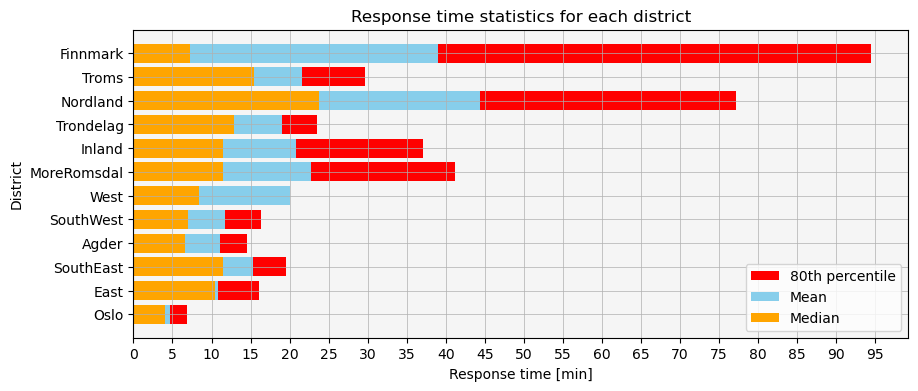

In [7]:
# Bar plot of main statistics for each district
utilityModule.plot_horizontal_barplot_all_districts(district_stats_summary, figsize=(10, 4))

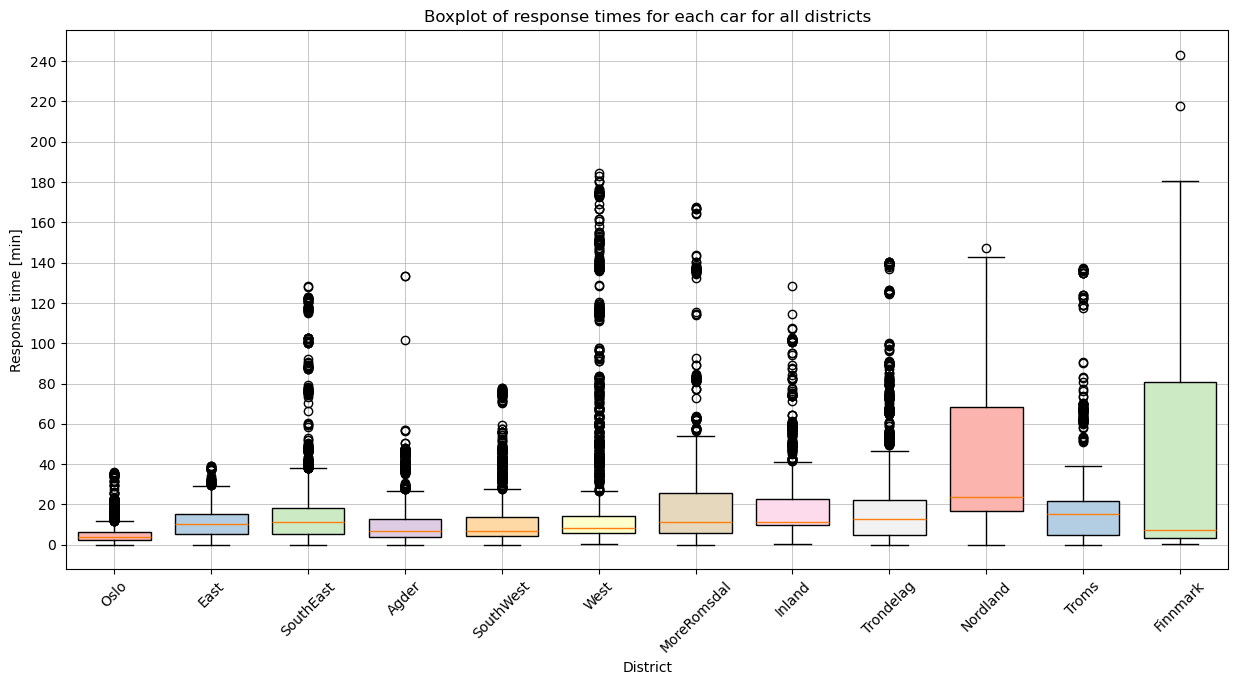

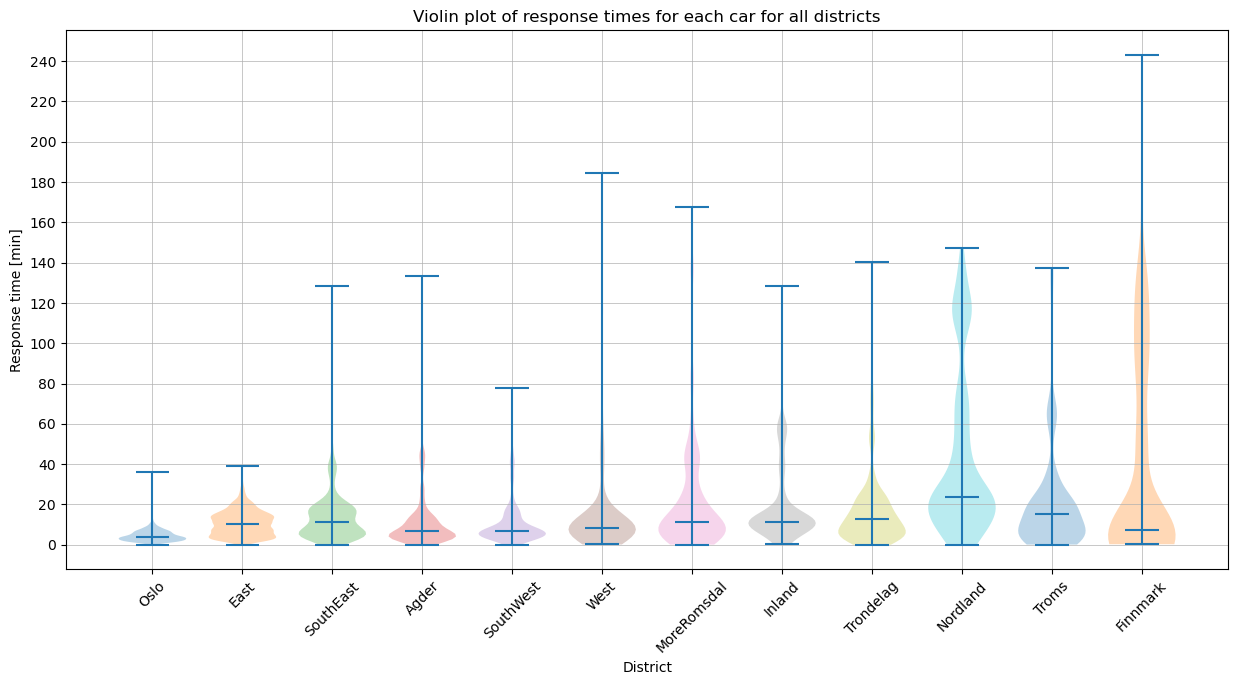

In [8]:
# Boxplot and violin plot of travel times for each district
utilityModule.plot_travel_time_boxplot_all_districts(car_to_events_dict, figsize=(15, 7))
utilityModule.plot_travel_time_violinplot_all_districts(car_to_events_dict, figsize=(15, 7))

## 3) Visualize single district statistics

Using Oslo district as an analysis example.

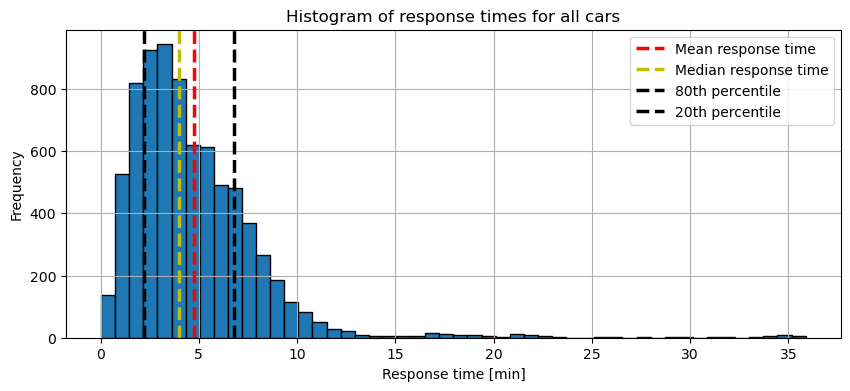

In [9]:
# Histogram - single district
utilityModule.plot_travel_time_histogram_district(car_to_events_dict['Oslo'], district_wide_stats_dict['Oslo'], figsize=(10, 4))

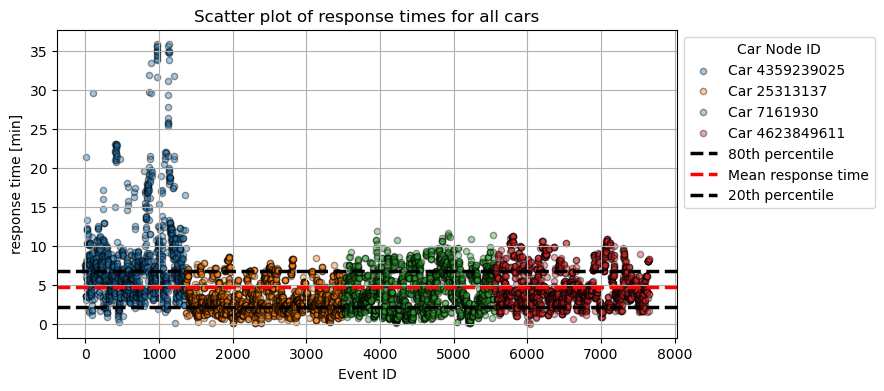

In [10]:
# Scatterplot - single district
utilityModule.plot_travel_time_scatterplot_district(car_to_events_dict['Oslo'], district_wide_stats_dict['Oslo'], figsize=(8, 4))

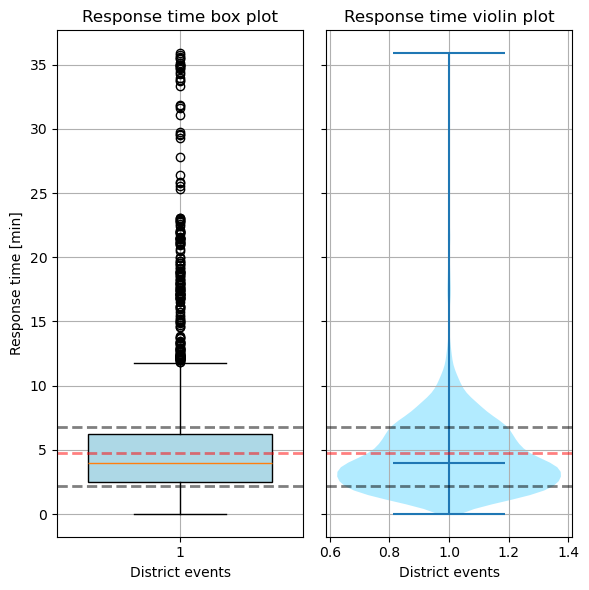

In [11]:
# Boxplot and violin plot - single district
utilityModule.plot_travel_time_box_violin_district(car_to_events_dict['Oslo'], district_wide_stats_dict['Oslo'], figsize=(6,6))

## 4) Visualize within-district statistics for individual cars

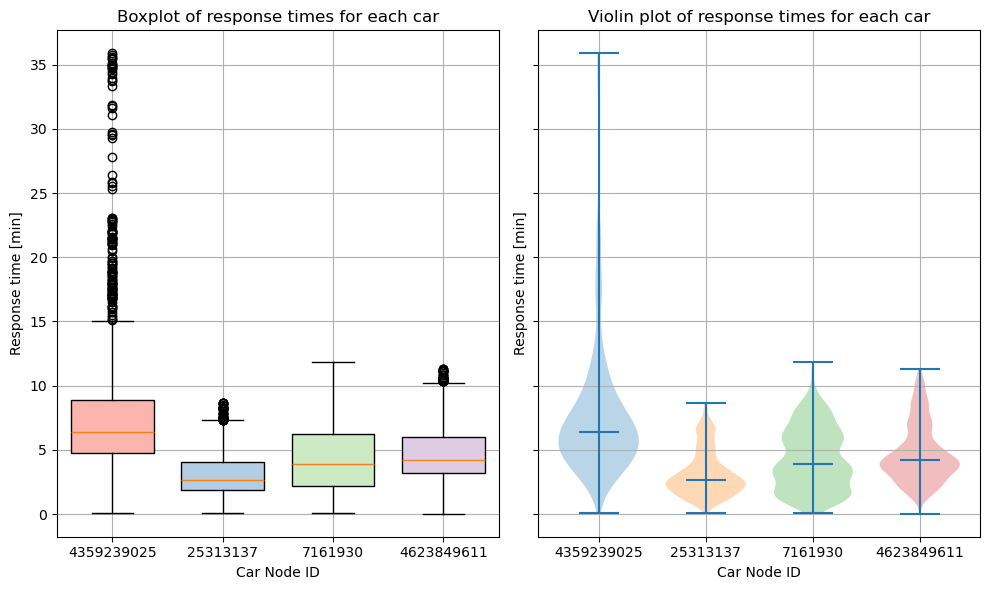

In [12]:
# Boxplot and Violinplot - single district, all cars
utilityModule.plot_travel_time_box_violin_cars(car_to_events_dict['Oslo'], figsize=(10,6))